In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from lppls import lppls_cmaes

In [2]:
# Download S&P 500 historical data (Gold futures as 'GC=F')
data = yf.download('^GSPC', start='2022-01-01', progress=False)

In [3]:
# Convert time to ordinal
time = [pd.Timestamp.toordinal(t1) for t1 in data.index]

In [4]:
# Log transformation of the adjusted close price
price = np.log(data['Adj Close'].values)

In [5]:
# Create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [6]:
results = []
for t1_index in np.arange(0, 650, 30):
    observations_window = observations[:, t1_index:]

    lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations_window)

    try:
        tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
        
        predicted_prices = lppls_model.lppls(observations_window[0], tc, m, w, a, b, c1, c2)
        
        # Compute RSS (Residual Sum of Squares)
        residuals = observations_window[1] - predicted_prices
        rss = np.sum(np.abs(residuals))  # Sum of squared residuals
        
        results.append((rss, tc, t1_index))
    except:
        pass

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=716030, Wed Oct 23 12:41:11 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 9.225104741086315e-02 1.0e+00 9.95e-01  8e-02  5e+04 0:03.3
    2    320 9.222244615350407e-02 1.6e+00 1.03e+00  9e-02  5e+04 0:03.3
    3    480 9.223993436234236e-02 2.1e+00 1.07e+00  9e-02  4e+04 0:03.4
   60   9600 9.211641895385091e-02 6.3e+01 1.20e+01  6e-05  4e+00 0:06.4
  100  16000 9.211641842858348e-02 1.8e+02 1.07e+01  4e-05  3e+00 0:08.6
  192  30720 9.211641617167024e-02 2.0e+02 1.54e+01  9e-06  6e-01 0:13.7
  200  32000 9.211641726950594e-02 5.1e+02 1.56e+01  1e-05  8e-01 0:14.0
  300  48000 9.211641956193234e-02 4.9e+03 1.48e+01  3e-06  8e-01 0:19.8
  400  64000 9.211641934464304e-02 2.4e+04 1.04e+01  1e-06  2e-01 0:25.2


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.4e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:41:41 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=477)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  500  80000 9.211641831710421e-02 4.0e+00 7.64e+00  1e-01  9e+00 0:30.7
  526  84160 9.211641865163459e-02 4.4e+00 1.69e+01  1e-01  1e+01 0:32.2
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=757973, Wed Oct 23 12:41:44 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 9.060579837541236e-02 1.0e+00 9.89e-01  7e-02  5e+04 0:01.3
    2    320 9.060333896164059e-02 1.9e+00 1.17e+00  1e-01  5e+04 0:01.3
    3    480 9.066901697752594e-02 2.4e+00 1.05e+00  8e-02  4e+04 0:01.3
   58   9280 9.048018875854662e-02 7.1e+01 4.29e+00  5e-05  5e+00 0:04.4
  100  16000 9.048018635606608e-02 6.7e+01 1.85e+00  2e-05  7e-01 0:06.8
  184  29440 9.048018808965369e-02 4.5e+03 5.44e+00  7e-05  6e+00 0:11.8
  200  32000 9.048018877779923e-02 4.7e+03 4.82e+00  5e-05  4e+00 0:12.7
  300  48000 9.048018907285280e-02 6.9e+04 3.38e+00  1e-05  1e+00 0:18.3
  400  64000 9.048018913189575e-02 1.4e+04 3.28e+00  8e-07  7e-02 0:23.8
  500  80000 9.048018759615595e-

C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.5e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:42:34 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=315)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  400  64000 8.632124291651404e-02 1.4e+02 8.66e+01  1e-01  4e+01 0:21.2
  500  80000 8.632124287021531e-02 5.8e+02 4.61e+01  6e-03  2e+00 0:26.6
  520  83200 8.632123942545769e-02 1.9e+03 1.00e+02  9e-03  3e+00 0:27.8
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=763685, Wed Oct 23 12:42:46 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 7.435072564622872e-02 1.0e+00 1.01e+00  8e-02  5e+04 0:00.0
    2    320 7.415444738895285e-02 1.6e+00 1.08e+00  1e-01  4e+04 0:00.1
    3    480 7.122546194851383e-02 2.5e+00 1.07e+00  1e-01  3e+04 0:00.1
   61   9760 7.434513621181009e-02 5.8e+02 1.97e+00  1e-04  1e+01 0:03.2
  100  16000 7.434513641859403e-02 2.2e+03 2.79e+00  8e-05  2e+01 0:05.1
  194  31040 7.434513639077836e-02 1.1e+04 4.20e+00  1e-04  6e+00 0:10.2
  200  32000 7.434513638579932e-02 1.4e+04 4.33e+00  1e-04  5e+00 0:10.5
  300  48000 7.434513637933131e-02 1.4e+05 3.11e+00  2e-05  8e-01 0:15.7


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.3e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:43:04 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=337)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  400  64000 7.434513622596545e-02 1.2e+01 3.19e+00  1e-02  8e-01 0:21.2
  500  80000 7.434513635321405e-02 1.2e+02 2.50e+00  5e-03  2e-01 0:26.7
  510  81600 7.434513636947826e-02 1.9e+02 2.81e+00  6e-03  3e-01 0:27.3
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=682494, Wed Oct 23 12:43:15 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 6.691482304263385e-02 1.0e+00 9.57e-01  7e-02  4e+04 0:00.1
    2    320 6.531355668358554e-02 2.5e+00 9.97e-01  6e-02  4e+04 0:00.1
    3    480 6.662062083822280e-02 2.2e+00 1.05e+00  7e-02  4e+04 0:00.2
   62   9920 6.917163802231827e-02 6.0e+02 3.09e+00  2e-04  1e+00 0:03.2
  100  16000 6.917163766076968e-02 1.5e+03 3.42e+00  1e-04  2e-01 0:05.2
  194  31040 6.917163753942768e-02 1.4e+04 5.59e+00  3e-05  4e-02 0:10.2
  200  32000 6.917163803343768e-02 1.3e+04 4.95e+00  2e-05  3e-02 0:10.5
  300  48000 6.917163805860412e-02 1.1e+05 3.01e+00  2e-06  4e-03 0:15.6


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.2e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:43:35 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=366)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  400  64000 6.917163802541375e-02 5.6e+00 2.35e+00  1e-01  1e+00 0:20.9
  500  80000 6.917163807216865e-02 7.9e+01 7.46e+00  3e-02  6e-01 0:26.1
  505  80800 6.917163811296956e-02 8.3e+01 7.33e+00  2e-02  5e-01 0:26.4
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=764790, Wed Oct 23 12:43:42 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 6.504346329688787e-02 1.0e+00 8.94e-01  6e-02  4e+04 0:00.0
    2    320 6.505527038793936e-02 1.9e+00 9.24e-01  6e-02  4e+04 0:00.1
    3    480 6.128368904633462e-02 2.0e+00 8.64e-01  6e-02  4e+04 0:00.1
   63  10080 6.501670762563022e-02 1.4e+02 5.39e+00  1e-04  3e+00 0:03.2
  100  16000 6.501670735448500e-02 5.6e+02 3.29e+00  1e-04  7e-01 0:05.1
  196  31360 6.501670808101007e-02 1.1e+04 9.19e-01  2e-06  2e-02 0:10.2
  200  32000 6.501670756769795e-02 8.0e+03 9.10e-01  2e-06  2e-02 0:10.3
  300  48000 6.501670783601277e-02 3.0e+03 5.11e-01  2e-07  3e-03 0:16.0
  400  64000 6.501670834180512e-

C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.6e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:44:11 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=515)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  526  84160 6.501670793172264e-02 3.2e+00 5.79e-01  2e-01  4e-01 0:27.9
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=732238, Wed Oct 23 12:44:12 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 4.119433075292772e-02 1.0e+00 9.58e-01  7e-02  1e+04 0:00.1
    2    320 4.101145329678486e-02 5.4e+00 1.01e+00  7e-02  7e+03 0:00.1
    3    480 4.090885110069182e-02 1.3e+01 1.16e+00  9e-02  7e+03 0:00.2
   50   8000 4.060699595682339e-02 7.3e+02 2.95e+01  6e-08  2e-04 0:02.5
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=831993, Wed Oct 23 12:44:14 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 3.948699131071525e-02 1.0e+00 9.93e-01  7e-02  2e+04 0:00.0
    2    320 3.815923496010690e-02 4.6e+00 1.08e+00  7e-02  9e+03 0:00.1
    3    480 3.757150654449538e-02 1.1e+01 1.23e+00  8e-02  7e+03 0:00.1
   44   7040 3.385905107992214e-02 5.1e+02 2.95e+00  6e-08  2e-04 0:02.9
(80_w,160)-aC

C:\Users\User\anaconda3\envs\ml\Lib\site-packages\lppls\lppls.py:617: RuntimeWarning: divide by zero encountered in scalar divide
  return (w / (2.0 * np.pi)) * np.log((tc - t1) / (tc - t2))


   36   5760 1.106258366281949e-02 4.4e+01 9.56e-01  4e-08  9e-04 0:01.5
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=751792, Wed Oct 23 12:44:33 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 8.524129430122009e-03 1.0e+00 1.02e+00  9e-02  3e+04 0:00.0
    2    320 8.524343058031510e-03 2.9e+00 1.16e+00  1e-01  3e+04 0:00.1
    3    480 8.523581823283419e-03 4.0e+00 1.27e+00  1e-01  3e+04 0:00.1
   65  10400 8.518403252013567e-03 5.5e+02 3.35e+00  4e-05  8e-01 0:03.2
  100  16000 8.518403246391856e-03 3.4e+02 6.80e+00  2e-05  7e-01 0:04.8
  200  32000 8.518403236315218e-03 4.5e+03 1.77e+01  7e-06  2e-01 0:09.8
  300  48000 8.518403229659669e-03 6.3e+04 4.14e+01  1e-05  2e-01 0:14.5


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.6e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:44:50 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=340)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  400  64000 8.518403226721778e-03 5.8e+01 2.38e+01  1e-01  3e+00 0:19.5
  500  80000 8.518403190948345e-03 8.9e+02 2.58e+01  8e-02  2e+00 0:24.5
  510  81600 8.518403213902737e-03 7.6e+02 2.64e+01  3e-02  7e-01 0:24.9
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=734874, Wed Oct 23 12:44:59 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 7.458364815055523e-03 1.0e+00 9.29e-01  6e-02  2e+04 0:00.0
    2    320 7.359220610574786e-03 3.2e+00 1.03e+00  6e-02  2e+04 0:00.1
    3    480 7.319485290297873e-03 3.8e+00 1.02e+00  5e-02  2e+04 0:00.1
   74  11840 7.550865779501649e-03 5.4e+02 1.75e+00  6e-05  1e-01 0:03.1
  100  16000 7.550865778668214e-03 3.3e+02 1.84e+00  3e-05  9e-02 0:04.2
  200  32000 7.550865781628911e-03 1.6e+04 9.58e-01  6e-06  2e-02 0:08.7
  300  48000 7.550865781062469e-03 3.1e+05 8.25e-01  5e-07  2e-03 0:13.0


C:\Users\User\anaconda3\envs\ml\Lib\site-packages\cma\utilities\utils.py:347: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.2e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 23 12:45:13 2024 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=310)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  400  64000 7.550865780414364e-03 1.9e+01 8.69e-01  8e-02  2e-01 0:17.5
  500  80000 7.550865778164127e-03 3.5e+01 8.44e-01  9e-03  2e-02 0:22.2
  505  80800 7.550865779858573e-03 3.4e+01 7.73e-01  5e-03  1e-02 0:22.5
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=768830, Wed Oct 23 12:45:23 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 6.375812061971959e-03 1.0e+00 9.21e-01  8e-02  2e+04 0:00.0
    2    320 6.353277476450421e-03 4.2e+00 8.38e-01  7e-02  1e+04 0:00.1
    3    480 5.886445428256968e-03 5.2e+00 1.03e+00  9e-02  2e+04 0:00.1
   50   8000 4.863474636900979e-03 5.7e+02 2.09e+00  2e-07  1e-03 0:02.1
(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=810750, Wed Oct 23 12:45:25 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 4.374167629770187e-03 1.0e+00 9.54e-01  7e-02  3e+04 0:00.0
    2    320 4.297281065700475e-03 2.8e+00 9.22e-01  6e-02  1e+04 0:00.1
    3    480 

In [15]:
opt_params = sorted(results, key=lambda x: x[0])[1]
tc_opt = opt_params[1]

In [16]:
opt_params

(0.9274814193221985, 739181.9834413526, 600)

In [17]:
print(pd.Timestamp.fromordinal(int(tc_opt)))

2024-10-22 00:00:00


In [18]:
observations_window = observations[:, opt_params[2]:]

In [19]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations_window)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=782973, Wed Oct 23 12:47:29 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 1.839523605389963e-03 1.0e+00 9.74e-01  8e-02  2e+04 0:00.0
    2    320 1.890940564409430e-03 4.9e+00 1.11e+00  9e-02  1e+04 0:00.1
    3    480 1.731600524997368e-03 8.0e+00 1.12e+00  8e-02  3e+03 0:00.1
   35   5600 1.666006593271635e-03 1.9e+03 1.76e+00  2e-07  1e-04 0:01.4
2024-10-22 00:00:00


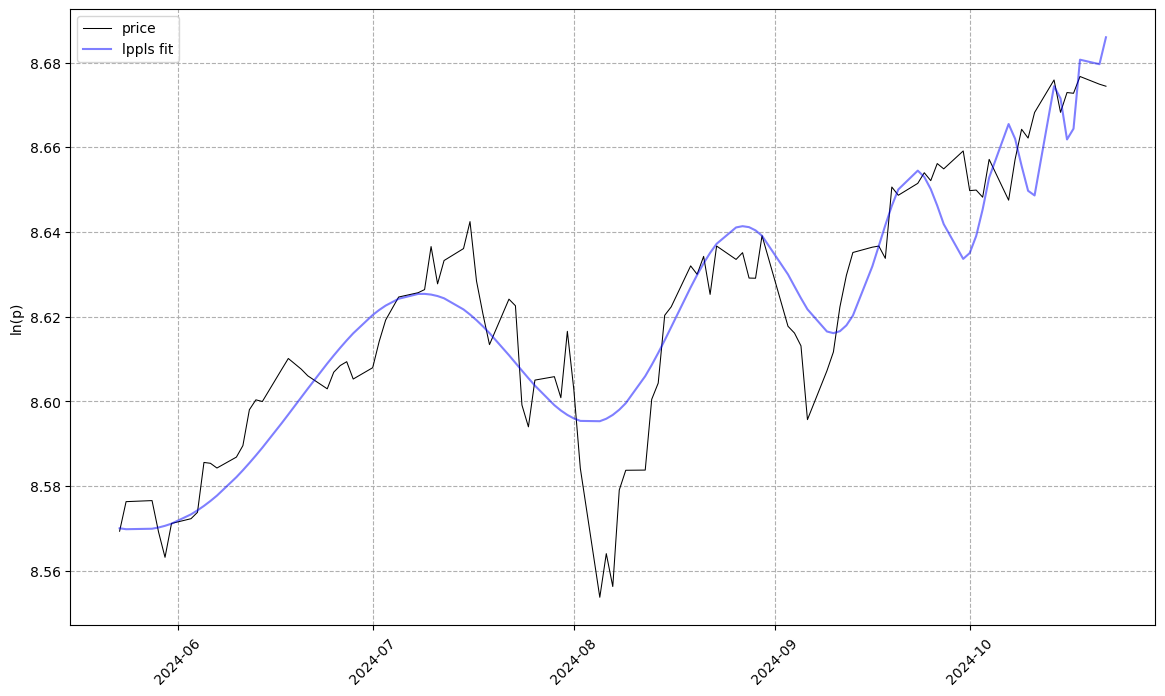

In [20]:
# visualize the fit
lppls_model.plot_fit()

In [21]:
len(observations_window[0])

105

In [22]:
len(observations_window[0])

105